# CO543 – Image Processing
# Lab 05
# Fourier Transformation


### E/17/297


In [40]:
folder = "/content/drive/MyDrive/CO543/Lab 5/"

In [41]:
import cv2 
import numpy as np
from matplotlib import pyplot as plt


In [42]:
img = cv2.imread(folder+'car-2.jpg',0)

#pass grayscale image
f = np.fft.fft2(img)

# Shift the zero-frequency component to the center of the spectrum.
fshift = np.fft.fftshift(f)

# apply logarithm, otherwise the image can not identify easily, change and see the changes.
magnitude_spectrum = 20*np.log(np.abs(fshift))


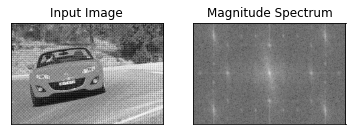

In [43]:
plt.subplot(121),plt.imshow(img, cmap='gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()


### Reconstruct image from inverse fourier transform (spectrum)

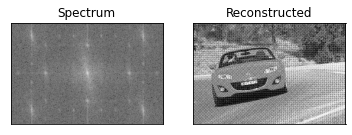

In [44]:
# f is transformed image
I2 = np.fft.ifft2(f)

#get the real part
I3 = np.real(I2)

plt.subplot(121), plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Spectrum'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(I3, cmap = 'gray')
plt.title('Reconstructed'), plt.xticks([]), plt.yticks([])
plt.show()

###  Apply low-pass filter for an image

In [45]:
img_float32 = np.float32(img)

dft = cv2.dft(img_float32, flags = cv2.DFT_COMPLEX_OUTPUT)

dft_shift = np.fft.fftshift(dft)

rows, cols = img.shape
crow, ccol = rows//2 , cols//2 #center

# create a mask first, center square is 1, remaining all zeros
mask = np.zeros((rows, cols, 2), np.uint8)
mask[crow-30:crow+30, ccol-30:ccol+30] = 1

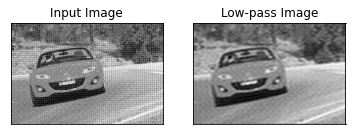

In [46]:
# apply mask and inverse DFT
fshift = dft_shift*mask
f_ishift = np.fft.ifftshift(fshift)

img_back = cv2.idft(f_ishift)
img_back = cv2.magnitude(img_back[:,:,0], img_back[:,:,1])

plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(img_back, cmap = 'gray')
plt.title('Low-pass Image'), plt.xticks([]), plt.yticks([]) 
plt.show()


# LAB TASKS

### 1. Apply high pass laplacian filter on Car.jpg image.


In [47]:
img_float32 = np.float32(img)

dft = cv2.dft(img_float32, flags = cv2.DFT_COMPLEX_OUTPUT)

dft_shift = np.fft.fftshift(dft)

rows, cols = img.shape
crow, ccol = rows//2 , cols//2 #center

# create a mask for highpass laplacian filter
mask = np.ones((rows, cols, 2), np.float32)

for i in range(rows):
  for j in range(cols):
    distance = np.sqrt((i-crow)**2 + (j-ccol)**2)
    laplaceEq = -4 * (np.pi**2) * distance**2
    mask[i][j] = [laplaceEq, laplaceEq]

# apply mask and inverse DFT
fshift = dft_shift*mask
f_ishift = np.fft.ifftshift(fshift)

img_high_pass_laplacian = cv2.idft(f_ishift)
img_high_pass_laplacian = cv2.magnitude(img_high_pass_laplacian[:,:,0], img_high_pass_laplacian[:,:,1])

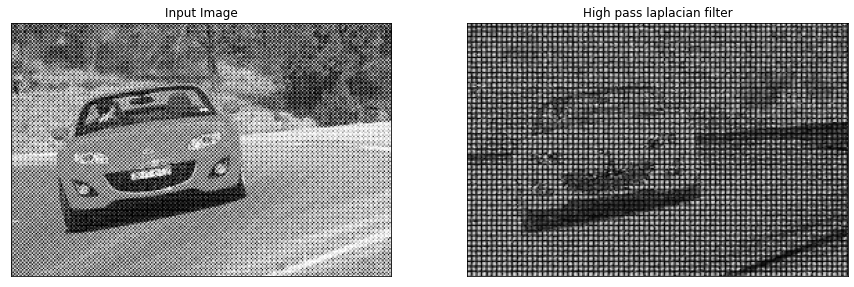

In [48]:
plt.figure(figsize= (15,10))
plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(img_high_pass_laplacian, cmap = 'gray')
plt.title('High pass laplacian filter'), plt.xticks([]), plt.yticks([]) 
plt.show()

### 2. Apply ideal high-pass filter on Car.jpg image for D0=100


In [49]:
img_float32 = np.float32(img)

dft = cv2.dft(img_float32, flags = cv2.DFT_COMPLEX_OUTPUT)

dft_shift = np.fft.fftshift(dft)

D0 = 100
rows, cols = img.shape
crow, ccol = rows//2 , cols//2 #center

# create a mask for ideal highpass filter
mask = np.ones((rows, cols, 2), np.uint8)


for i in range(rows):
  for j in range(cols):
    distance = np.sqrt((i-crow)**2 + (j-ccol)**2)
    if distance <= D0:
      mask[i][j] = [0,0]

# apply mask and inverse DFT
fshift = dft_shift*mask
f_ishift = np.fft.ifftshift(fshift)

img_high_pass = cv2.idft(f_ishift)
img_high_pass = cv2.magnitude(img_high_pass[:,:,0], img_high_pass[:,:,1])



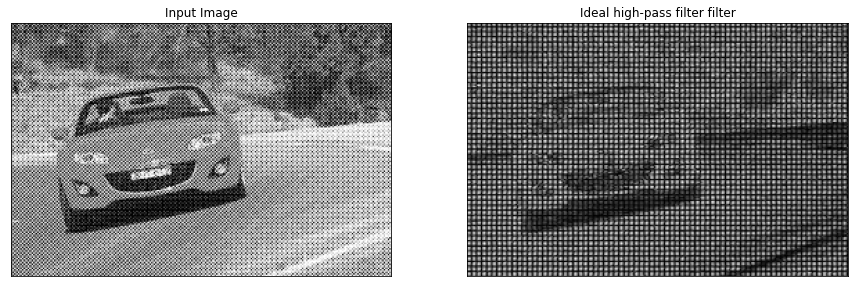

In [50]:
plt.figure(figsize= (15,10))
plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(img_high_pass, cmap = 'gray')
plt.title('Ideal high-pass filter filter'), plt.xticks([]), plt.yticks([]) 
plt.show()

### 3. Apply ideal low-pass filter on Car.jpg image for D0=100


In [51]:
img_float32 = np.float32(img)

dft = cv2.dft(img_float32, flags = cv2.DFT_COMPLEX_OUTPUT)

dft_shift = np.fft.fftshift(dft)

D0 = 100
rows, cols = img.shape
crow, ccol = rows//2 , cols//2 #center

# create a mask for ideal highpass filter
mask = np.ones((rows, cols, 2), np.uint8)


for i in range(rows):
  for j in range(cols):
    distance = np.sqrt((i-crow)**2 + (j-ccol)**2)
    if distance <= D0:
      mask[i][j] = [1,1]

# apply mask and inverse DFT
fshift = dft_shift*mask
f_ishift = np.fft.ifftshift(fshift)

img_low_pass = cv2.idft(f_ishift)
img_low_pass = cv2.magnitude(img_low_pass[:,:,0], img_low_pass[:,:,1])



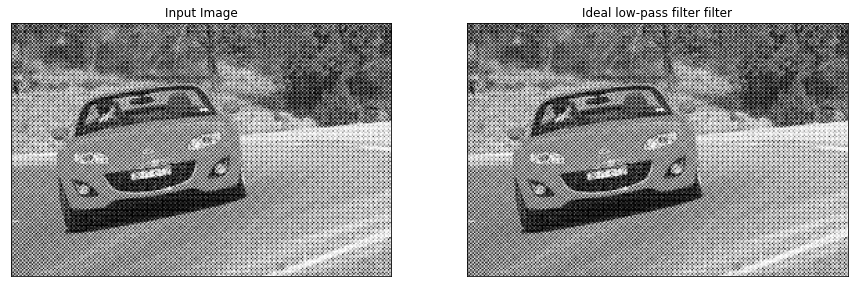

In [52]:
plt.figure(figsize= (15,10))
plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(img_low_pass, cmap = 'gray')
plt.title('Ideal low-pass filter filter'), plt.xticks([]), plt.yticks([]) 
plt.show()

### 4. Apply FFT2, IFFT2, low-pass Gaussian filter, and high-pass laplacian filter on Car.jpg image.


In [53]:
# FFT2

#pass grayscale image
f = np.fft.fft2(img)

# Shift the zero-frequency component to the center of the spectrum.
fshift = np.fft.fftshift(f)

# apply logarithm, otherwise the image can not identify easily.
magnitude_spectrum = 20*np.log(np.abs(fshift))

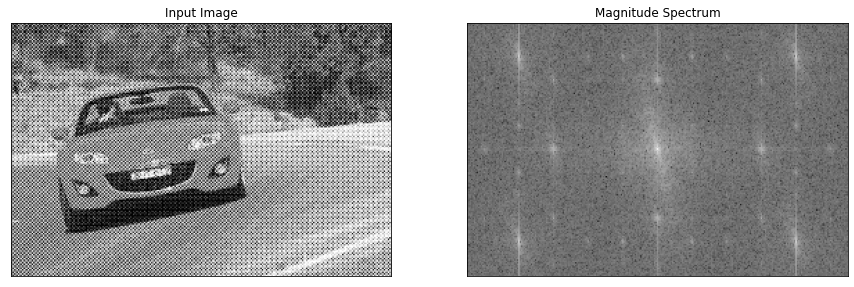

In [54]:
plt.figure(figsize= (15,10))
plt.subplot(121),plt.imshow(img, cmap='gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

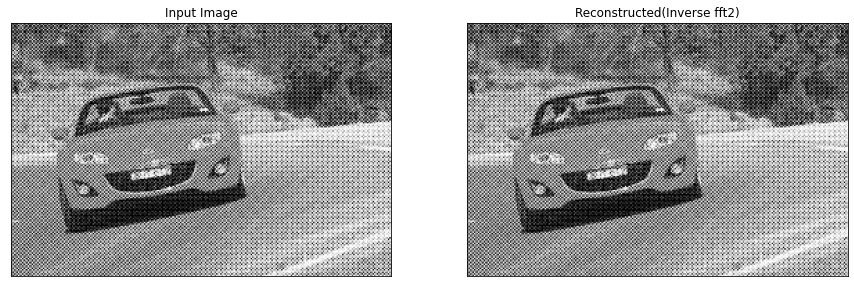

In [55]:
# IFFT2
# f is transformed image
I2 = np.fft.ifft2(f)

#get the real part
I3 = np.real(I2)

plt.figure(figsize= (15,10))
plt.subplot(121), plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(I3, cmap = 'gray')
plt.title('Reconstructed(Inverse fft2)'), plt.xticks([]), plt.yticks([])
plt.show()


#### low-pass Gaussian filter

In [56]:
img_float32 = np.float32(img)

dft = cv2.dft(img_float32, flags = cv2.DFT_COMPLEX_OUTPUT)

dft_shift = np.fft.fftshift(dft)

D0 = 100
rows, cols = img.shape
crow, ccol = rows//2 , cols//2 #center

# create a mask for low-pass Gaussian filter
mask = np.ones((rows, cols, 2), np.float32)

for i in range(rows):
  for j in range(cols):
    distance = np.sqrt((i-crow)**2 + (j-ccol)**2)
    gaussianEq = np.exp((-1*distance**2)/(2*D0**2))
    mask[i][j] = [gaussianEq,gaussianEq]

# apply mask and inverse DFT
fshift = dft_shift*mask
f_ishift = np.fft.ifftshift(fshift)

img_low_pass_gaussian = cv2.idft(f_ishift)
img_low_pass_gaussian = cv2.magnitude(img_low_pass_gaussian[:,:,0], img_low_pass_gaussian[:,:,1])



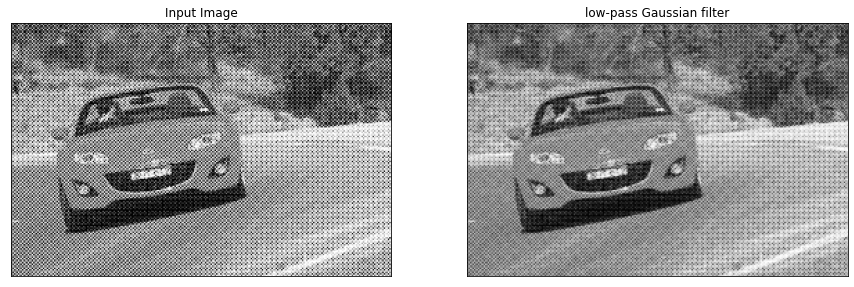

In [57]:
plt.figure(figsize= (15,10))
plt.subplot(121), plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(img_low_pass_gaussian, cmap = 'gray')
plt.title('low-pass Gaussian filter'), plt.xticks([]), plt.yticks([])
plt.show()


#### high-pass laplacian filter

In [58]:
img_float32 = np.float32(img)

dft = cv2.dft(img_float32, flags = cv2.DFT_COMPLEX_OUTPUT)

dft_shift = np.fft.fftshift(dft)

D0 = 100
rows, cols = img.shape
crow, ccol = rows//2 , cols//2 #center

# create a mask for high-pass laplacian filter
mask = np.ones((rows, cols, 2), np.float32)

for i in range(rows):
  for j in range(cols):
    distance = np.sqrt((i-crow)**2 + (j-ccol)**2)
    laplaceEq = -4 * (np.pi**2) * distance**2
    mask[i][j] = [laplaceEq,laplaceEq]

# apply mask and inverse DFT
fshift = dft_shift*mask
f_ishift = np.fft.ifftshift(fshift)

img_high_pass_laplacian = cv2.idft(f_ishift)
img_high_pass_laplacian = cv2.magnitude(img_high_pass_laplacian[:,:,0], img_high_pass_laplacian[:,:,1])



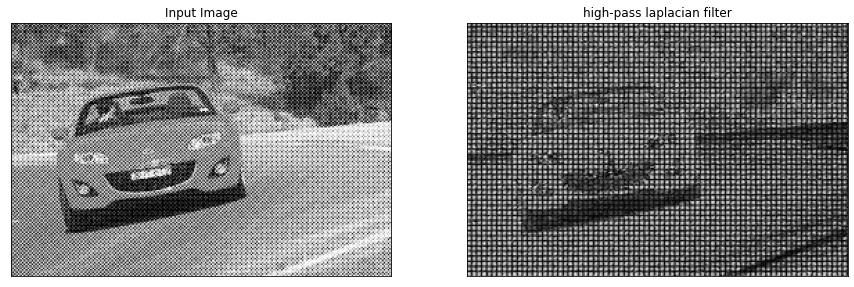

In [59]:
plt.figure(figsize= (15,10))
plt.subplot(121), plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(img_high_pass_laplacian, cmap = 'gray')
plt.title('high-pass laplacian filter'), plt.xticks([]), plt.yticks([])
plt.show()

### 5. Apply the necessary filter and correct the noise in the image. Image file is uploaded.


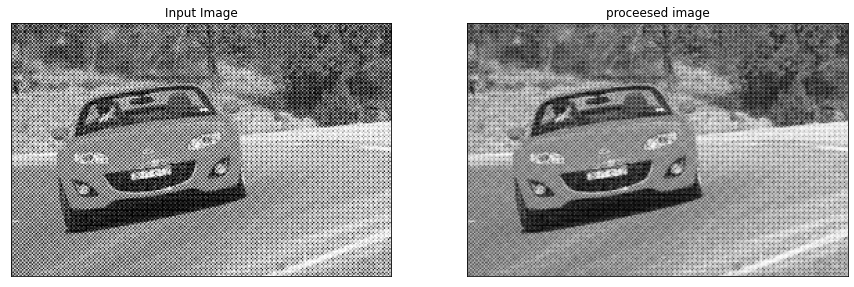

In [65]:
img_float32 = np.float32(img)

dft = cv2.dft(img_float32, flags = cv2.DFT_COMPLEX_OUTPUT)

dft_shift = np.fft.fftshift(dft)

D0 = 100
rows, cols = img.shape
crow, ccol = rows//2 , cols//2 #center

# low-pass Gaussian filter
mask_low_pass_gaussian = np.zeros((rows,cols,2), dtype=np.float32)

for i in range(rows):
  for j in range(cols):
    distance = np.sqrt((i-crow)**2 + (j-ccol)**2)
    mask_low_pass_gaussian[i][j] = np.exp((-1*distance**2)/(2*D0**2))

# low-pass ideal
D0l = 150
mask_low_pass_ideal = np.zeros((rows,cols,2), dtype=np.uint8)

for i in range(rows):
  for j in range(cols):
    distance = np.sqrt((i-crow)**2 + (j-ccol)**2)
    mask_low_pass_ideal[i][j] = 255 if distance <= D0l else 0


# apply mask and inverse DFT
fshift = dft_shift*mask_low_pass_gaussian*mask_low_pass_ideal
f_ishift = np.fft.ifftshift(fshift)

img_proceesed = cv2.idft(f_ishift)
img_proceesed = cv2.magnitude(img_proceesed[:,:,0], img_proceesed[:,:,1])


plt.figure(figsize= (15,10))
plt.subplot(121), plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(img_proceesed, cmap = 'gray')
plt.title('proceesed image'), plt.xticks([]), plt.yticks([])
plt.show()

### 6. Apply the sobel operator (filter) on Car.jpg in the Fourier domain to detect edges.


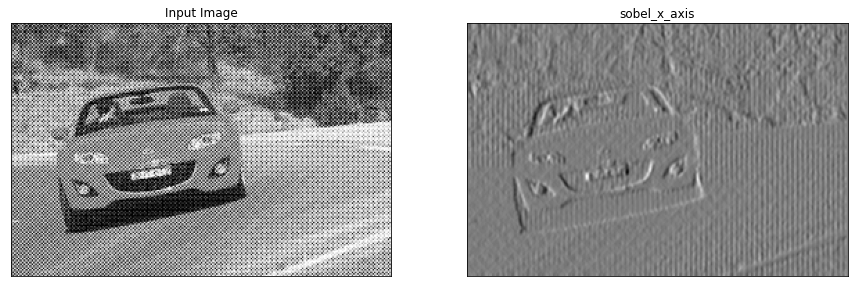

In [68]:
sobel_x_axis = cv2.Sobel(src=img, ddepth=cv2.CV_64F, dx=1, dy=0, ksize=5)

sobel_y_axis = cv2.Sobel(src=img, ddepth=cv2.CV_64F, dx=0, dy=1, ksize=5)

sobel_xy_axis = cv2.Sobel(src=img, ddepth=cv2.CV_64F, dx=1, dy=1, ksize=5)

plt.figure(figsize= (15,10))
plt.subplot(121), plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(sobel_x_axis, cmap = 'gray')
plt.title('sobel_x_axis'), plt.xticks([]), plt.yticks([])
plt.show()



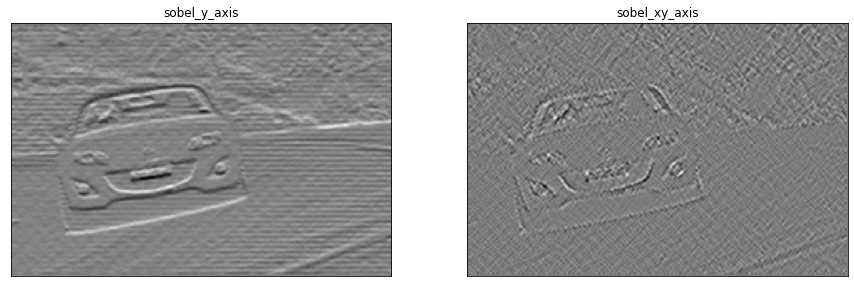

In [69]:
plt.figure(figsize= (15,10))
plt.subplot(121), plt.imshow(sobel_y_axis, cmap = 'gray')
plt.title('sobel_y_axis'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(sobel_xy_axis, cmap = 'gray')
plt.title('sobel_xy_axis'), plt.xticks([]), plt.yticks([])
plt.show()

### 7. Discuss applying Butterworth and Chebyshev filters and compare the output image with the Gaussian Filter image (You may use a preferred image to discuss the characteristics of the output images in Q7.)

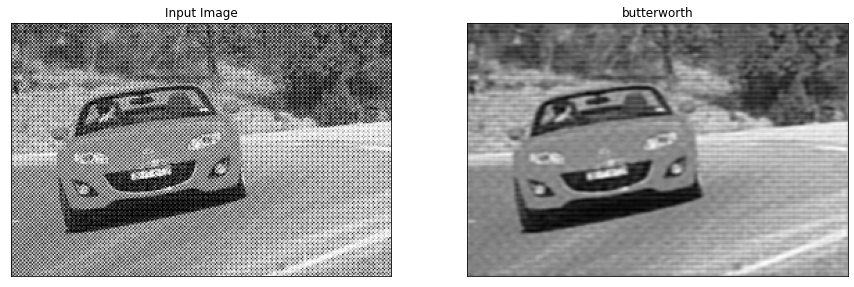

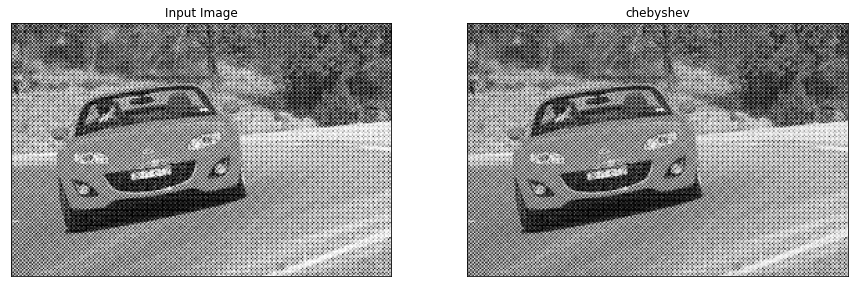

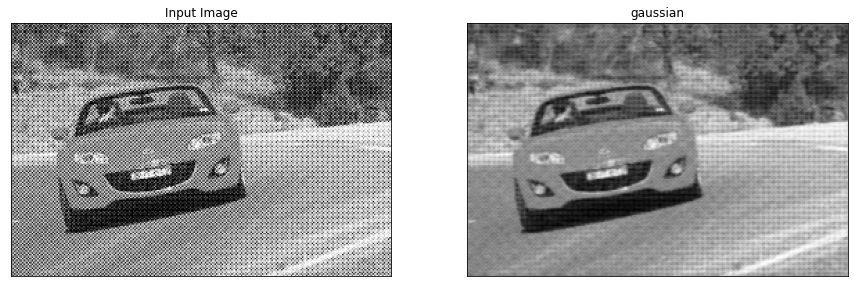

In [77]:
img_float32 = np.float32(img)

dft_butterworth = cv2.dft(img_float32, flags = cv2.DFT_COMPLEX_OUTPUT)
dft_chebyshev = cv2.dft(img_float32, flags = cv2.DFT_COMPLEX_OUTPUT)
dft_gaussian = cv2.dft(img_float32, flags = cv2.DFT_COMPLEX_OUTPUT)

dft_shift_butterworth = np.fft.fftshift(dft_butterworth)
dft_shift_chebyshev = np.fft.fftshift(dft_chebyshev)
dft_shift_gaussian = np.fft.fftshift(dft_gaussian)

rows, cols = img.shape
crow, ccol = rows//2 , cols//2 #center

cut_off_frequncy_butterworth = 50
order_butterworth = 3
mask_butterworth = np.zeros((rows,cols,2), dtype=np.float32)
for i in range(rows):
  for j in range(cols):
    distance = np.sqrt((i-crow)**2 + (j-ccol)**2)
    mask_butterworth[i][j] = 1/(1+((distance/cut_off_frequncy_butterworth) ** (2*order_butterworth)))

cut_off_frequncy_chebyshev = 50
order_chebyshev = 3
ripple = 0.25
mask_chebyshev = np.zeros((rows,cols,2), dtype=np.float32)
for i in range(rows):
  for j in range(cols):
    distance = np.sqrt((i-crow)**2 + (j-ccol)**2)
    Cn = np.cos(order_chebyshev * np.arccos(distance/cut_off_frequncy_chebyshev)) if np.abs(distance/cut_off_frequncy_chebyshev) <= 1 else np.cos(order_chebyshev * np.arccosh(distance/cut_off_frequncy_chebyshev))
    mask_chebyshev[i][j] = 1/(1+(ripple**2)*(Cn**2))


D0 = 50
mask_gaussian = np.zeros((rows, cols, 2), dtype=np.float32)
for i in range(rows):
  for j in range(cols):
    distance = np.sqrt((i-crow)**2 + (j-ccol)**2)
    mask_gaussian[i][j] = np.exp(-(distance**2)/(2*(D0**2)))



# apply mask and inverse DFT
fshift_butterworth = dft_shift_butterworth * mask_butterworth
f_ishift_butterworth = np.fft.ifftshift(fshift_butterworth)
img_butterworth = cv2.idft(f_ishift_butterworth)
img_butterworth = cv2.magnitude(img_butterworth[:,:,0], img_butterworth[:,:,1])

fshift_chebyshev = dft_shift_chebyshev * mask_chebyshev
f_ishift_chebyshev = np.fft.ifftshift(fshift_chebyshev)
img_chebyshev = cv2.idft(f_ishift_chebyshev)
img_chebyshev = cv2.magnitude(img_chebyshev[:,:,0], img_chebyshev[:,:,1])

fshift_gaussian = dft_shift_gaussian * mask_gaussian
f_ishift_gaussian = np.fft.ifftshift(fshift_gaussian)
img_gaussian = cv2.idft(f_ishift_gaussian)
img_gaussian = cv2.magnitude(img_gaussian[:,:,0], img_gaussian[:,:,1])



plt.figure(figsize= (15,10))
plt.subplot(121), plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(img_butterworth, cmap = 'gray')
plt.title('butterworth'), plt.xticks([]), plt.yticks([])
plt.show()

plt.figure(figsize= (15,10))
plt.subplot(121), plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(img_chebyshev, cmap = 'gray')
plt.title('chebyshev'), plt.xticks([]), plt.yticks([])
plt.show()

plt.figure(figsize= (15,10))
plt.subplot(121), plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(img_gaussian, cmap = 'gray')
plt.title('gaussian'), plt.xticks([]), plt.yticks([])
plt.show()
